<a href="https://colab.research.google.com/github/swastika200/Career-Guidance-System/blob/main/Career.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "dataset9000.csv"
df = pd.read_csv(file_path)

# Fill missing values
df.fillna("Not Interested", inplace=True)

# Convert categorical skill levels into numerical values
skill_levels = {
    "Not Interested": 0,
    "Beginner": 1,
    "Average": 2,
    "Intermediate": 3,
    "Professional": 4
}

# Apply the mapping to all skill columns
skill_columns = df.columns[:-1]  # Exclude 'Role' column
df[skill_columns] = df[skill_columns].applymap(lambda x: skill_levels.get(x, 0))

# Display the first few rows after processing
print(df.head())


   Database Fundamentals  Computer Architecture  \
0                      4                      0   
1                      4                      0   
2                      4                      1   
3                      4                      2   
4                      4                      3   

   Distributed Computing Systems  Cyber Security  Networking  \
0                              0               0           0   
1                              0               0           0   
2                              0               0           0   
3                              0               0           0   
4                              0               0           0   

   Software Development  Programming Skills  Project Management  \
0                     0                   0                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                 

/tmp/ipython-input-2-798019447.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[skill_columns] = df[skill_columns].applymap(lambda x: skill_levels.get(x, 0))


In [3]:
df["Role"].unique()


array(['Database Administrator', 'Hardware Engineer',
       'Application Support Engineer', 'Cyber Security Specialist',
       'Networking Engineer', 'Software Developer', 'API Specialist',
       'Project Manager', 'Information Security Specialist',
       'Technical Writer', 'AI ML Specialist', 'Software tester',
       'Business Analyst', 'Customer Service Executive', 'Data Scientist',
       'Helpdesk Engineer', 'Graphics Designer'], dtype=object)

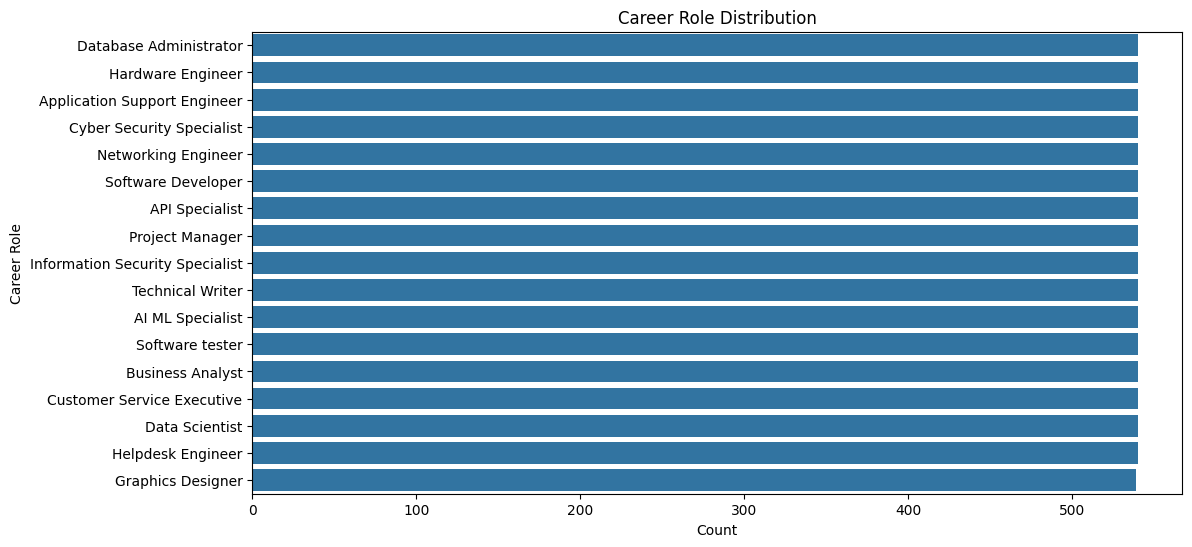

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=df["Role"], order=df["Role"].value_counts().index)
plt.title("Career Role Distribution")
plt.xlabel("Count")
plt.ylabel("Career Role")
plt.show()


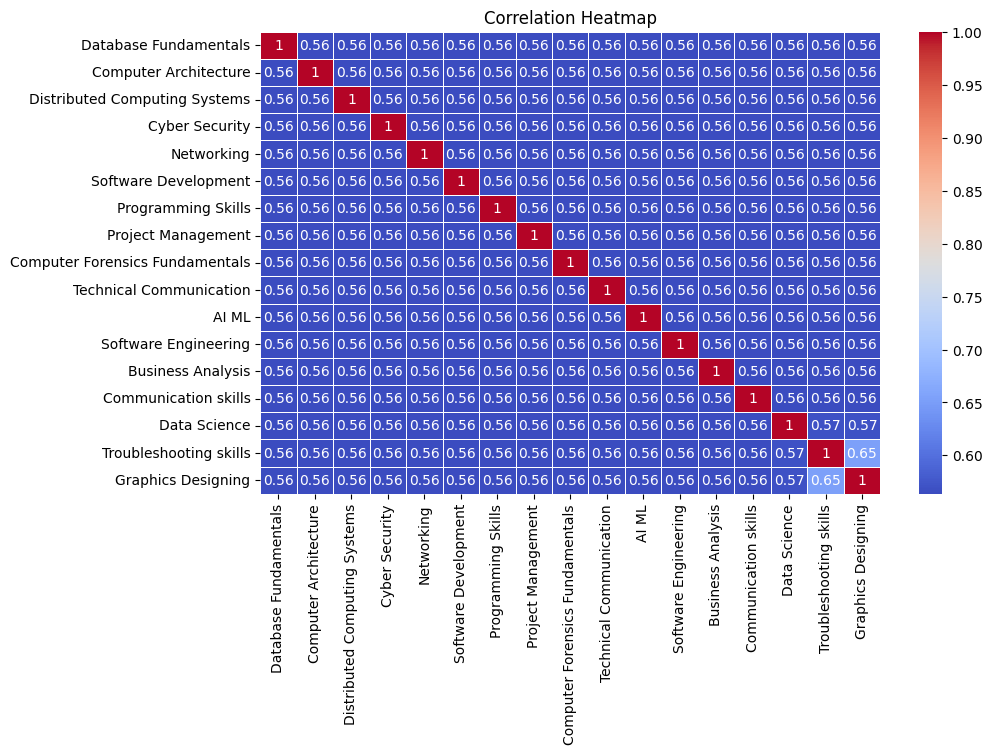

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features for correlation
numerical_features = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5) # calculate the correlation on numerical_features only.
plt.title("Correlation Heatmap")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["Role"])
y = df["Role"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [8]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training target labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the test target labels using the trained encoder
y_test_encoded = label_encoder.transform(y_test)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),

    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    # Use the encoded target labels for training
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)  # Predict
    # Use the encoded target labels for evaluation
    acc = accuracy_score(y_test_encoded, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}\n")


Training Random Forest...
Random Forest Accuracy: 1.00

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:23:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.00

Training SVM...
SVM Accuracy: 1.00

Training KNN...
KNN Accuracy: 0.98



In [9]:
# Print all model performances
print("Model Performance Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")

# Select the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Performing Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")

# Save the best model for deployment
import joblib
joblib.dump(best_model, "best_career_model.pkl")


Model Performance Comparison:
Random Forest: 1.00
XGBoost: 1.00
SVM: 1.00
KNN: 0.98

Best Performing Model: Random Forest with Accuracy: 1.00


['best_career_model.pkl']

/tmp/ipython-input-10-2675155806.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="viridis")


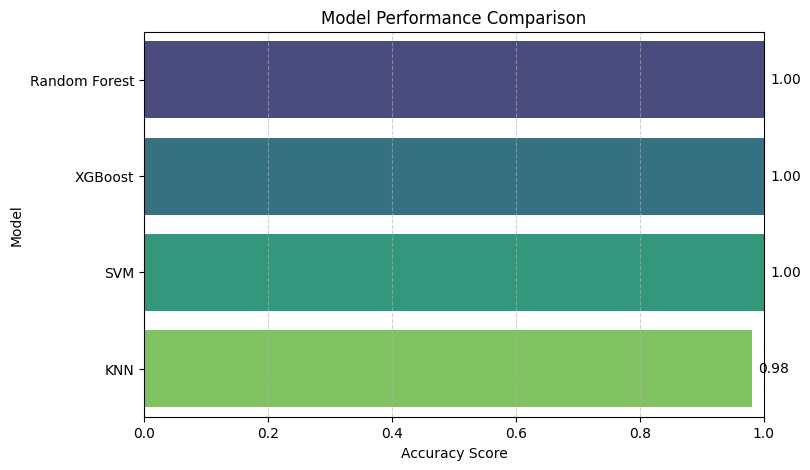

In [10]:
# Visualization of Model Performance

import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for visualization
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=accuracies, y=model_names, palette="viridis")

plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.xlim(0, 1)  # Since accuracy is between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate accuracy values on the bars
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.show()


/tmp/ipython-input-11-3950344031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="coolwarm")


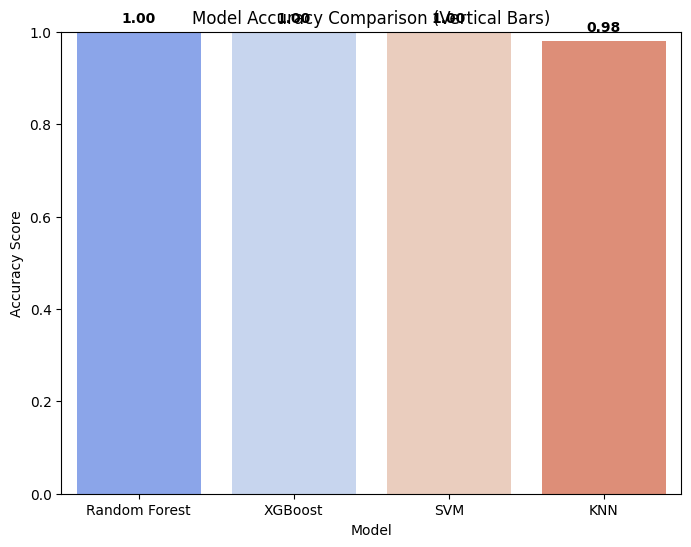

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette="coolwarm")

plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.title("Model Accuracy Comparison (Vertical Bars)")
plt.ylim(0, 1)

# Add values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


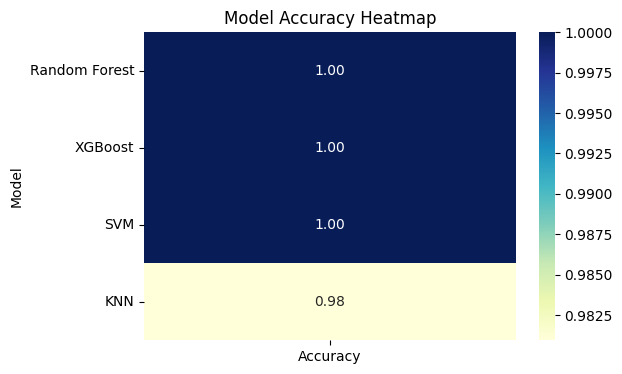

In [12]:
import pandas as pd

performance_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
performance_df = performance_df.set_index('Model')

plt.figure(figsize=(6, 4))
sns.heatmap(performance_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)

plt.title("Model Accuracy Heatmap")
plt.show()


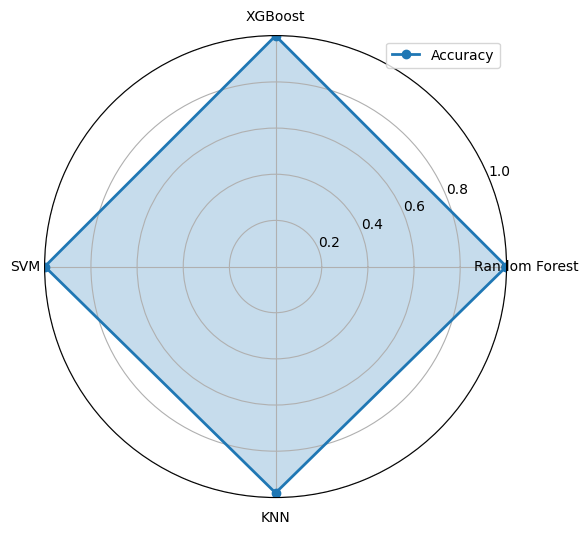

In [13]:
import numpy as np

# Radar chart setup
labels = np.array(model_names)
stats = np.array(accuracies)

# Repeat first value to close the radar chart
stats = np.append(stats, stats[0])
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, stats, 'o-', linewidth=2, label="Accuracy")
ax.fill(angles, stats, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("")
plt.legend(loc='upper right')
plt.show()


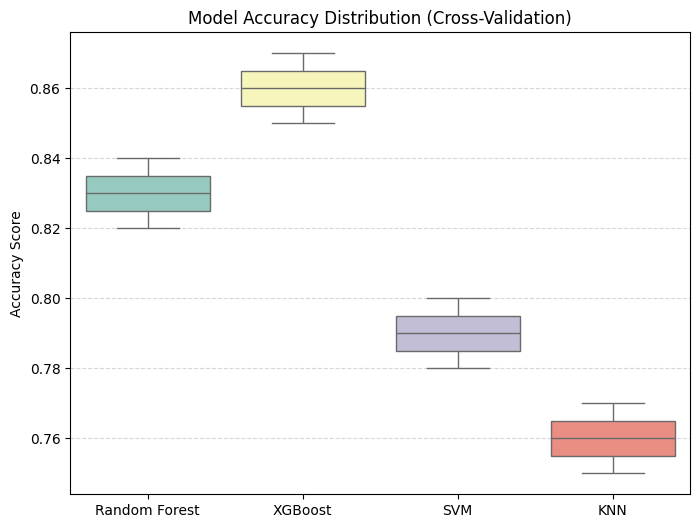

In [14]:
# Sample structure; assumes you have multiple scores per model
cv_results = {
    "Random Forest": [0.82, 0.84, 0.83],
    "XGBoost": [0.85, 0.87, 0.86],
    "SVM": [0.78, 0.80, 0.79],
    "KNN": [0.76, 0.77, 0.75]
}

cv_df = pd.DataFrame(cv_results)

plt.figure(figsize=(8, 6))
sns.boxplot(data=cv_df, palette="Set3")

plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Distribution (Cross-Validation)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [16]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.14).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [17]:
!git config --global user.name "Swastika200"


In [19]:
!git clone https://github.com/Swastika200/Career-Guidance-System.git


Cloning into 'Career-Guidance-System'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
